In [6]:
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
139,140,Female,35,74,72
78,79,Female,23,54,52
164,165,Male,50,85,26
43,44,Female,31,39,61
152,153,Female,44,78,20
147,148,Female,32,77,74
150,151,Male,43,78,17
57,58,Male,69,44,46
138,139,Male,19,74,10
187,188,Male,28,101,68


In [10]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]


In [11]:
data.sample(10)

,Annual Income (k$),Spending Score (1-100)
195,120,79
164,85,26
150,78,17
30,30,4
106,63,50
3,16,77
8,19,3
10,19,14
89,58,46
60,46,56


In [12]:
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(10)

,income,score
52,43,54
130,71,9
60,46,56
140,75,5
193,113,91
1,15,81
139,74,72
73,50,56
57,44,46
2,16,6


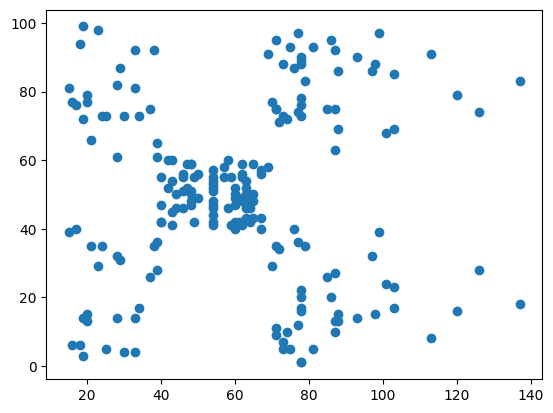

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [18]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

In [19]:
wcss_error

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25028.020475269415,
 21913.92920119442,
 19657.783608703958]

Text(0, 0.5, 'WCSS Eroor')

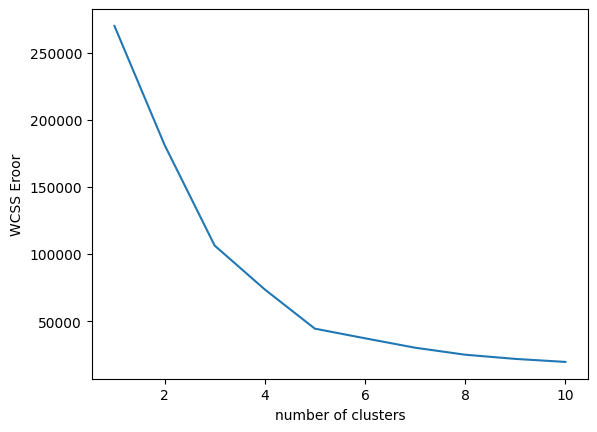

In [20]:
plt.plot(k_values,wcss_error)
plt.xlabel('number of clusters')
plt.ylabel('WCSS Eroor')

In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
pred

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 3, 4, 0, 4, 0, 4,
       3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [23]:
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
data['cluster']=pred
data.head(5)

,income,score,cluster
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1


In [25]:
c1=data[data['cluster']==0]
c2=data[data['cluster']==1]
c3=data[data['cluster']==2]
c4=data[data['cluster']==3]
c5=data[data['cluster']==4]

In [26]:
c4.head()

,income,score,cluster
43,39,61,3
46,40,55,3
47,40,47,3
48,40,42,3
49,40,42,3


In [27]:
c5.head()

,income,score,cluster
123,69,91,4
125,70,77,4
127,71,95,4
129,71,75,4
131,71,75,4


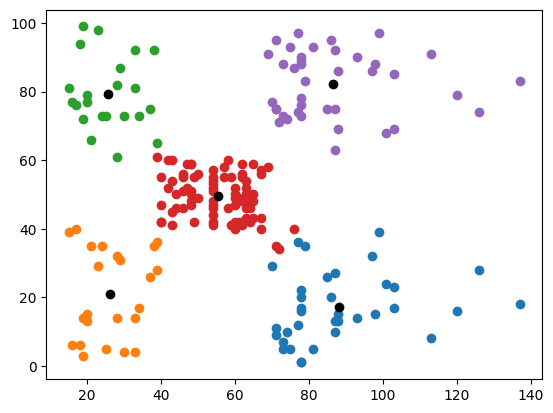

In [38]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

In [33]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513]])